In [1]:
import pandas as pd
from tqdm.auto import tqdm
import os 
import json
import numpy as np

In [2]:
# plot the data
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.style.use(['science', 'nature'])
plt.rcParams.update(tex_fonts)

import matplotlib.font_manager

fm = matplotlib.font_manager.json_load("/home/smunir/.cache/matplotlib/fontlist-v330.json")

fm.findfont("serif", rebuild_if_missing=False)

'/home/smunir/.conda/envs/querygraph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf'

# Calculate average accuracy scores

In [3]:
RESULT_DIR = "results/20k-run-6-19-23"

with open(os.path.join(RESULT_DIR, "accuracy")) as f:
    lines = f.readlines()
    print(lines)

    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    count = 0
    for line in lines:
        accuracy = 0
        precision = 0
        recall = 0
        if "Accuracy" in line:
            accuracy = line.split(":")[1].strip()
        elif "Precision" in line and 'binary' in line:
            precision = line.split(":")[1].split(' ')[2].strip()
        elif "Recall" in line and 'binary' in line:
            recall = line.split(":")[1].split(' ')[2].strip()
        
        if accuracy != 0:
            total_accuracy += float(accuracy.replace('%', ''))
            count += 1
        if precision != 0:
            total_precision += float(precision.replace('%', ''))
        if recall != 0:
            total_recall += float(recall.replace('%', ''))
        

    print(f"Average accuracy: {total_accuracy/count}")
    print(f"Average precision: {total_precision/count}")
    print(f"Average recall: {total_recall/count}")

['\n', 'Accuracy score: 98.754%\n', 'Precision score: binary 98.383%\n', 'Recall score: binary 99.037%\n', 'Precision score: micro 98.754%\n', 'Recall score: micro 98.754%\n', 'Precision score: macro 98.742%\n', 'Recall score: macro 98.764%\n', '\n', 'Accuracy score: 98.525%\n', 'Precision score: binary 98.602%\n', 'Recall score: binary 98.426%\n', 'Precision score: micro 98.525%\n', 'Recall score: micro 98.525%\n', 'Precision score: macro 98.526%\n', 'Recall score: macro 98.524%\n', '\n', 'Accuracy score: 99.021%\n', 'Precision score: binary 98.746%\n', 'Recall score: binary 99.275%\n', 'Precision score: micro 99.021%\n', 'Recall score: micro 99.021%\n', 'Precision score: macro 99.019%\n', 'Recall score: macro 99.024%\n', '\n', 'Accuracy score: 98.733%\n', 'Precision score: binary 98.772%\n', 'Recall score: binary 98.843%\n', 'Precision score: micro 98.733%\n', 'Recall score: micro 98.733%\n', 'Precision score: macro 98.73%\n', 'Recall score: macro 98.725%\n', '\n', 'Accuracy score: 9

In [4]:
df_labeled = pd.read_csv('results/20k-run-6-19-23/labelled_results.csv')

/tmp/ipykernel_453481/2340170461.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_negative = np.histogram(df_labeled[df_labeled.num_exfil < 100][df_labeled.label == 'Negative'].num_exfil, 20)
/tmp/ipykernel_453481/2340170461.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_positive = np.histogram(df_labeled[df_labeled.num_exfil < 100][df_labeled.label == 'Positive'].num_exfil, 20)


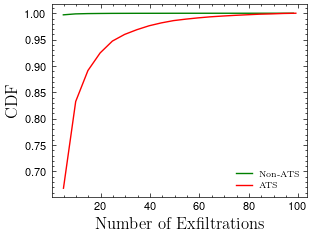

In [5]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.num_exfil < 100][df_labeled.label == 'Negative'].num_exfil, 20)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="Non-ATS", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.num_exfil < 100][df_labeled.label == 'Positive'].num_exfil, 20)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ATS", color='red')
plt.legend()
plt.xlabel("Number of Exfiltrations")
plt.ylabel("CDF")
plt.savefig("num_exfiltrations_cdf.pdf", dpi=300, bbox_inches='tight')

In [55]:
df_labeled[df_labeled.label == 'Positive'].num_exfil.describe()

count    61554.000000
mean         7.403093
std         20.563207
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1939.000000
Name: num_exfil, dtype: float64

In [57]:
df_labeled[df_labeled.label == 'Negative'].num_exfil.describe()

count    772266.000000
mean          0.061619
std           1.419115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         386.000000
Name: num_exfil, dtype: float64

In [6]:
df_labeled[df_labeled.label == 'Positive'].shannon_entropy.describe()

count    61554.000000
mean         3.589649
std          0.580914
min         -0.000000
25%          3.184184
50%          3.641604
75%          3.829240
max          5.815984
Name: shannon_entropy, dtype: float64

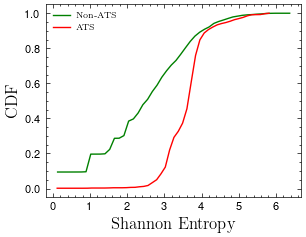

In [6]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'Negative'].shannon_entropy, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="Non-ATS", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.label == 'Positive'].shannon_entropy, 50)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ATS", color='red')
plt.legend()
plt.xlabel("Shannon Entropy")
plt.ylabel("CDF")
plt.savefig("shannon_entropy_cdf.pdf", dpi=300, bbox_inches='tight')

In [7]:
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'Negative'].shannon_entropy, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)

In [21]:
cdf_negative[24]

0.7041718786014146

In [22]:
cdf_positive[24]

0.0839425545049875

In [20]:
bins_negative[24]

3.057790110678849

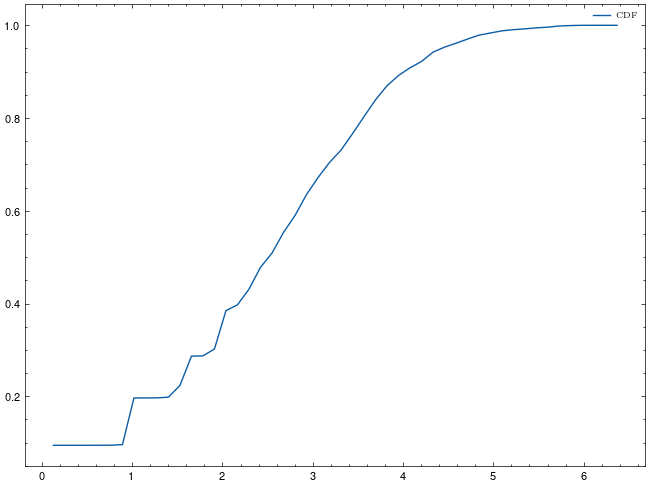

In [35]:
plt.figure(figsize=(8, 6))
count, bins = np.histogram(df_labeled[df_labeled.label == 'Negative'].shannon_entropy, 50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [ ]:
df_labeled[df_labeled.label == 'Positive'].shannon_entropy.describe()

In [7]:
df_labeled[df_labeled.label == 'Negative'].shannon_entropy.describe()

count    772266.000000
mean          2.430811
std           1.280676
min          -0.000000
25%           1.584963
50%           2.521641
75%           3.378783
max           6.370396
Name: shannon_entropy, dtype: float64

In [8]:
df_labeled[df_labeled.label == 'Positive'].num_edges.describe()

count     61554.000000
mean      14762.864639
std       15274.529082
min         139.000000
25%        5911.000000
50%       10956.000000
75%       20806.000000
max      408434.000000
Name: num_edges, dtype: float64

In [9]:
df_labeled[df_labeled.label == 'Negative'].num_edges.describe()

count    772266.000000
mean       6542.788499
std       10031.153772
min           2.000000
25%        1876.000000
50%        3915.000000
75%        8057.000000
max      408434.000000
Name: num_edges, dtype: float64

/tmp/ipykernel_453481/27867068.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_negative = np.histogram(df_labeled[df_labeled.num_edges < 100000][df_labeled.label == 'Negative'].num_edges, 50)
/tmp/ipykernel_453481/27867068.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_positive = np.histogram(df_labeled[df_labeled.num_edges < 100000][df_labeled.label == 'Positive'].num_edges, 50)


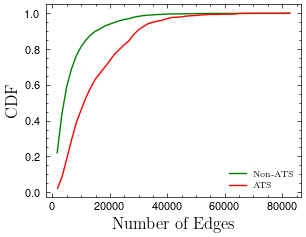

In [23]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.num_edges < 100000][df_labeled.label == 'Negative'].num_edges, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="Non-ATS", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.num_edges < 100000][df_labeled.label == 'Positive'].num_edges, 50)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ATS", color='red')
plt.legend()
plt.xlabel("Number of Edges")
plt.ylabel("CDF")
plt.savefig("number_of_edges_cdf.pdf", dpi=300, bbox_inches='tight')

In [37]:
cdf_negative[6]

0.8485338495406092

In [36]:
cdf_positive[6]

0.5290499975595073

In [35]:
bins_negative[6]

9915.8